## Relatório de Análises VII

## Criando Agrupamentos

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')

In [3]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


In [5]:
dados["Valor"].mean()

4985.730140445705

In [7]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [9]:
dados['Bairro'].drop_duplicates()

0          Copacabana
6     Barra da Tijuca
17             Tijuca
21            Ipanema
25           Botafogo
29             Leblon
81           Flamengo
Name: Bairro, dtype: object

In [10]:
grupo_bairro = dados.groupby('Bairro')

In [11]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [12]:
grupo_bairro.groups

{'Barra da Tijuca': [6, 16, 18, 23, 32, 34, 37, 44, 45, 58, 63, 64, 67, 71, 77, 82, 97, 111, 114, 116, 122, 133, 136, 138, 142, 156, 159, 161, 171, 172, 180, 195, 198, 217, 224, 231, 234, 243, 246, 249, 254, 269, 275, 285, 287, 302, 303, 304, 306, 313, 319, 322, 336, 346, 347, 356, 371, 377, 379, 385, 391, 398, 400, 411, 423, 444, 445, 447, 448, 451, 461, 463, 474, 475, 477, 485, 488, 497, 508, 514, 518, 526, 553, 554, 555, 556, 559, 563, 568, 570, 571, 572, 601, 605, 606, 608, 612, 614, 619, 629, ...], 'Botafogo': [25, 50, 91, 92, 115, 124, 132, 140, 206, 210, 235, 345, 373, 426, 427, 512, 539, 541, 561, 611, 669, 706, 740, 777, 786, 846, 851, 885, 940, 949, 953, 1036, 1073, 1110, 1121, 1140, 1147, 1158, 1171, 1197, 1235, 1239, 1258, 1285, 1318, 1332, 1341, 1355, 1386, 1421, 1453, 1458, 1496, 1559, 1572, 1623, 1676, 1704, 1720, 1750, 1794, 1795, 1843, 1869, 1878, 1881, 1908, 1978, 1987, 2012, 2014, 2029, 2041, 2051, 2092, 2130, 2133, 2145, 2147, 2148, 2152, 2161, 2216, 2217, 2233, 224

In [16]:
for bairro, dados in grupo_bairro:
    print('{} -> {}'.format(bairro, dados.Valor.mean()))

Barra da Tijuca -> 7073.721754654425
Botafogo -> 8690.962879640045
Copacabana -> 4137.4135556361
Flamengo -> 4148.489626556016
Ipanema -> 9375.905
Leblon -> 8757.75411119812
Tijuca -> 2042.1940700808625


In [19]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,100.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


## Estatísticas Descritivas

In [20]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,100.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por bairro')

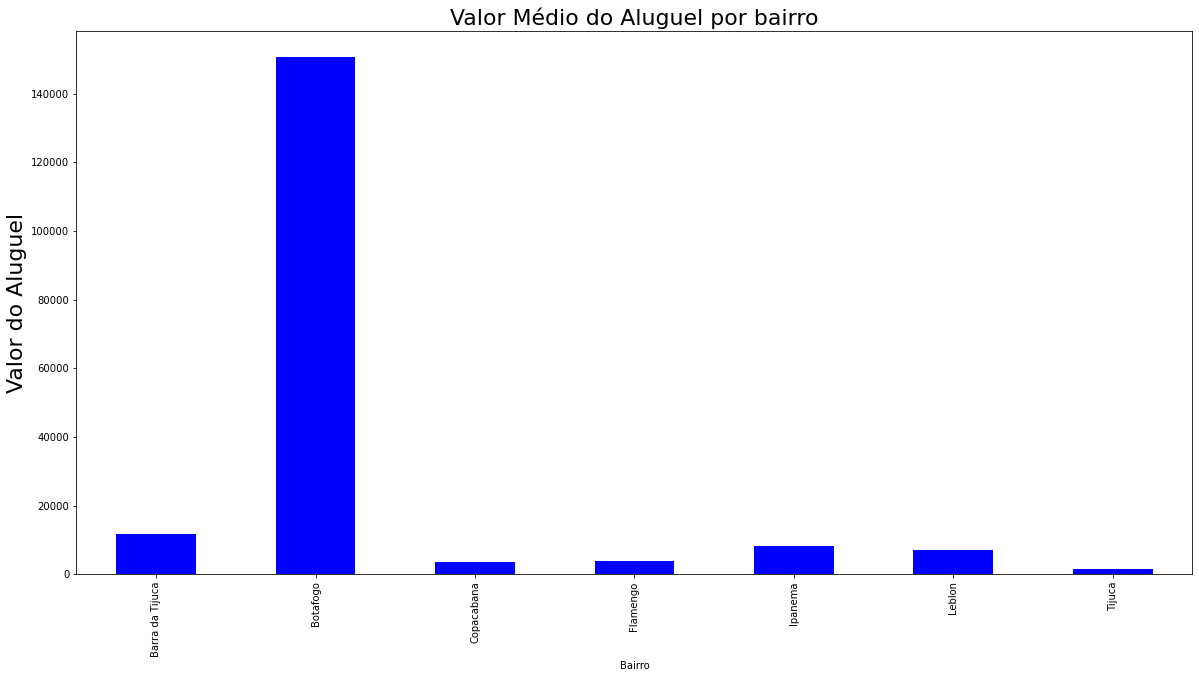

In [27]:
fig = grupo_bairro['Valor'].std().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel', {'fontsize' : 22})
fig.set_title('Valor Médio do Aluguel por bairro', {'fontsize' : 22})